In [ ]:
'''
File name : 2017-05-05_grabing_frames_with_opencv_on_ubuntu.ipynb
Authors : Pierre Albiges, Victor Boutin and Laurent Perrinet
Date created : 2017-04-25
Date last modified : 2017-05-04
Object : Apprehend the OpenRetina project through the manipulation of the PhotoReceptor class

See https://github.com/laurentperrinet/openRetina/blob/master/src/openRetina.py as source for the program
See https://github.com/pierrealbiges/INT-internship/ for associated documents
'''

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time

In [34]:
from camera import PhotoReceptor

# Grabbing one frame and exiting

Before a downscale of 6, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 6, dim1 : 120.0, dim2 : 160.0


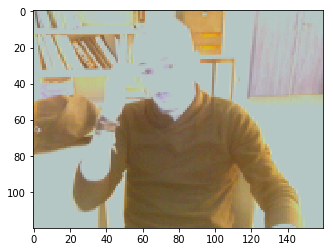

In [37]:
Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE=6)

#Ph.cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640.)
#Ph.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 360)
#print(Ph.cap.get(cv2.CAP_PROP_FRAME_HEIGHT), Ph.cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#frame = Ph.grab()
frame = Ph.grab()
Ph.close()

plt.imshow(frame)

# Benchmarking camera for different sizes

In [28]:
import numpy as np

downscales = [1, 1.25, 1.5, 2, 3, 4, 6, 6.5]

In [29]:
'''  Version a : Run the program and calculate the framerate (limit = number of frames recorded) '''

num_frames = 50
sizes_a, frames_a = [], []
for ds in downscales:
    
    Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE = ds)
    frame = Ph.grab()

    time.sleep(1)
    start = time.time()

    for i in range(num_frames):
        frame = Ph.grab()

    seconds = time.time() - start
        
    sizes_a.append(Ph.h*Ph.w)
    Ph.close()

    fps = num_frames / seconds
    frames_a.append(fps)
    print ('Frame rate : %s \n' % fps)

Before a downscale of 1, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 1, dim1 : 720.0, dim2 : 1280.0
Frame rate : 15.4404384266 

Before a downscale of 1.25, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 1.25, dim1 : 576.0, dim2 : 1024.0
Frame rate : 15.4303557922 

Before a downscale of 1.5, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 1.5, dim1 : 480.0, dim2 : 720.0
Frame rate : 15.567002366 

Before a downscale of 2, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 2, dim1 : 288.0, dim2 : 352.0
Frame rate : 15.4050024652 

Before a downscale of 3, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 3, dim1 : 240.0, dim2 : 320.0
Frame rate : 15.3867690714 

Before a downscale of 4, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 4, dim1 : 144.0, dim2 : 176.0
Frame rate : 15.3833469331 

Before a downscale of 6, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 6, dim1 : 120.0, dim2 : 160.0
Frame rate : 15.38280192

In [30]:
''' Version b : Run the program and calculate the framerate (limit = time recorded) '''

sizes_b, frames_b = [], []
for ds in downscales:
    Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE = ds)
    Rec = True
    nb_frames = 0

    start = time.time()

    while(Rec == True):

        frame = Ph.grab()
        nb_frames += 1
        
        seconds = time.time() - start
        
        if seconds >= 10 :
            Rec = False
    sizes_b.append(Ph.h*Ph.w)
           
    Ph.close()

    fps = nb_frames / seconds
    frames_b.append(fps)
    print ('Frame rate %s \n' % fps)

Before a downscale of 1, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 1, dim1 : 720.0, dim2 : 1280.0
Frame rate 13.0453401299 

Before a downscale of 1.25, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 1.25, dim1 : 576.0, dim2 : 1024.0
Frame rate 13.0462340644 

Before a downscale of 1.5, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 1.5, dim1 : 480.0, dim2 : 720.0
Frame rate 13.3746203564 

Before a downscale of 2, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 2, dim1 : 288.0, dim2 : 352.0
Frame rate 13.2618059846 

Before a downscale of 3, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 3, dim1 : 240.0, dim2 : 320.0
Frame rate 13.2625967492 

Before a downscale of 4, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 4, dim1 : 144.0, dim2 : 176.0
Frame rate 13.263489468 

Before a downscale of 6, dim1 : 720, dim2 : 1280
Using OpenCV
After a downscale of 6, dim1 : 120.0, dim2 : 160.0
Frame rate 13.2642898953 

Before a 

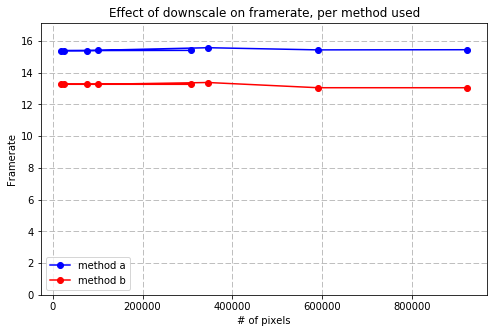

In [32]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(sizes_a, frames_a, 'b', marker='o', label='method a')
ax.plot(sizes_b, frames_b, 'r', marker='o', label='method b')
ax.grid(linestyle='--')
plt.legend()
ax.set_title('Effect of downscale on framerate, per method used')
ax.set_xlabel('# of pixels')
ax.set_ylabel('Framerate')
ax.set_ylim(0, 1.1*max(max(frames_a), max(frames_b)))
plt.show()